In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_data_from(file_dir):
    data = np.loadtxt(file_dir, delimiter=',')
    x = np.array([[1, features[0], features[-1]] for features in data[:, :2]])
    y = np.array(data[:, -1])
    return x, y


def normalize_features(data):
    mean = np.mean(data, axis=0)
    deviation = np.std(data, axis=0)
    standarized_data = data.copy()
    for features in standarized_data:
        for i in range(len(features)):
            if i == 0:
                pass
            else:
                features[i] = (features[i] - mean[i]) / deviation[i]

    return standarized_data


def compute_cost(features, labels, parameters):
    m = labels.size
    h_x = np.dot(features, parameters)
    cost = (1 / (2 * m)) * sum(np.square(h_x - labels))
    return cost


def gradient_descent(features, labels, epochs, learning_rate):
    J = []
    m = labels.size
    thetas = np.random.random(size=features[0, :].shape)
    for _ in range(epochs):
        h_x = np.dot(features, thetas)
        for i in range(len(thetas)):
            thetas[i] -= (learning_rate / m) * sum((h_x - labels) * features[:, i])
        J.append(compute_cost(features=features, labels=labels, parameters=thetas))

    return thetas, J


def visualize_loss(cost):
    plt.plot(cost)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.show()


def normal_equation(features, labels):
    x_T = np.transpose(features)
    a = np.linalg.inv(np.dot(x_T, features))
    b = np.dot(x_T, labels)
    return np.dot(a, b)

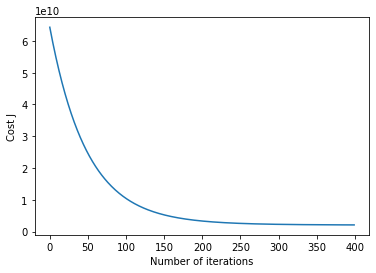

In [3]:
def main():
    x, y = get_data_from('ex1data2.txt')
    norm_x = normalize_features(x)

    epochs = 400
    alpha = 0.01
    optimized_thetas, J = gradient_descent(features=norm_x, labels=y, epochs=epochs, learning_rate=alpha)
    normal_eq_thetas = normal_equation(features=norm_x, labels=y)
    visualize_loss(cost=J)


if __name__ == '__main__':
    main()
